<center>
    <img src="https://web.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">
</center>


<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2021-22
</center></h1>

<h2><center>Assignment 2 – PS5 [Weightage 13%]</center></h2>

## Instructions
<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
    <li><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready.Most effective visuals would fetch maximum credits</div></li>    
    <li><div class="alert-warning">Submissions done via means other than CANVAS will strictly be NOT graded.</div></li>
  
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>

<h2>Group No: 63</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>A MANOVISHNU</td>
    <td>2022DC04044</td>
  </tr>
  <tr>
    <td>Manogni Surapaneni</td>
    <td>2022DC04257</td>
  </tr>
</table>

<h1>Objective</h1>
<h4>Perform EDA on retail data.</h4>


##  Download and Prep the Data: 1 Mark

<h4>Import the libraries needed</h4>

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

<h4> Load data and store in dataframe </h4>

In [46]:
df = pd.read_csv("dvi-a2-ps5-data.csv", encoding='latin1')

In [47]:
# Printing the No. of rows & columns in the dataframe.
df.shape 

(51290, 24)

In [48]:
# Printing the first 5 rows of dataframe in transpose view for better readability of data when exported to PDF format.
df.head(5)

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  MX-2014-143658   10/2/2014   10/6/2014  Standard Class    SC-20575   
1       2  MX-2012-155047  10/15/2012  10/20/2012  Standard Class    KW-16570   
2       3  MX-2012-155047  10/15/2012  10/20/2012  Standard Class    KW-16570   
3       4  MX-2012-155047  10/15/2012  10/20/2012  Standard Class    KW-16570   
4       5  MX-2012-155047  10/15/2012  10/20/2012  Standard Class    KW-16570   

    Customer Name   Segment           City             State  ...  \
0    Sonia Cooley  Consumer    Mexico City  Distrito Federal  ...   
1  Kelly Williams  Consumer  Dos Quebradas         Risaralda  ...   
2  Kelly Williams  Consumer  Dos Quebradas         Risaralda  ...   
3  Kelly Williams  Consumer  Dos Quebradas         Risaralda  ...   
4  Kelly Williams  Consumer  Dos Quebradas         Risaralda  ...   

        Product ID         Category Sub-Category  \
0  OFF-LA-10002782  Office Supplies       Labels   
1  FUR-FU-10004015        Furniture  Furnishings   
2  FUR-BO-10002352        Furniture    Bookcases   
3  OFF-BI-10004428  Office Supplies      Binders   
4  OFF-AR-10004594  Office Supplies          Art   

                         Product Name   Sales Quantity Discount Profit  \
0  Hon File Folder Labels, Adjustable   13.08        3      0.0   4.56   
1                Tenex Clock, Durable  252.16        8      0.0  90.72   
2        Ikea 3-Shelf Cabinet, Mobile  193.28        2      0.0  54.08   
3              Cardinal Binder, Clear   35.44        4      0.0   4.96   
4         Sanford Canvas, Water Color   71.60        2      0.0  11.44   

   Shipping Cost  Order Priority  
0           1.03          Medium  
1          13.45          Medium  
2           9.63          Medium  
3           1.37          Medium  
4           3.79          Medium  

[5 rows x 24 columns]

<h4>Find out  what type of variables you are dealing with. This will help you find the right visualization method for that variable.</h4>

In [49]:
# Printing the datatypes of all columns in the dataframe to understand the type of variables we are dealing with.
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [50]:
# printing the column names in the dataframe.
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

#### Perform data cleaning and mention the steps

In [51]:
# we have identified the below list of columns as useful for this assignment.
# For this purpose we are not gonna columns: "Order ID, Customer ID, Postal Code, Product ID"
selected_columns = ['Row ID',  'Order Date', 'Ship Date', 'Ship Mode', 
                    'Customer Name', 'Segment', 'City', 'State', 'Country', 
                    'Market', 'Region',  'Category', 'Sub-Category', 'Product Name', 
                    'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

In [52]:
# First of all we made a copy of the original dataset to make whatever we like without modify the original one.
retail_df=df[selected_columns].copy()

In [53]:
# For better manipulation of the columns in the further of assignment and to avoid getting into un-known issues,
# we have replaced spaces in names of some columns with "_".
retail_df.rename(columns={
        "Row ID":"Row_ID",
        "Order Date":"Order_Date",
        "Ship Date":"Ship_Date",
        "Ship Mode":"Ship_Mode",
        "Customer Name":"Customer_Name",
        "Product Name":"Product_Name",
        "Shipping Cost":"Shipping_Cost",
        "Order Priority":
        "Order_Priority"
    },inplace=True)

In [54]:
# printing the first 5 rows of the dataframe in transpose format (for readability), to validate the changes.
retail_df.head()

Row_ID  Order_Date   Ship_Date       Ship_Mode   Customer_Name   Segment  \
0       1   10/2/2014   10/6/2014  Standard Class    Sonia Cooley  Consumer   
1       2  10/15/2012  10/20/2012  Standard Class  Kelly Williams  Consumer   
2       3  10/15/2012  10/20/2012  Standard Class  Kelly Williams  Consumer   
3       4  10/15/2012  10/20/2012  Standard Class  Kelly Williams  Consumer   
4       5  10/15/2012  10/20/2012  Standard Class  Kelly Williams  Consumer   

            City             State   Country Market Region         Category  \
0    Mexico City  Distrito Federal    Mexico  LATAM  North  Office Supplies   
1  Dos Quebradas         Risaralda  Colombia  LATAM  South        Furniture   
2  Dos Quebradas         Risaralda  Colombia  LATAM  South        Furniture   
3  Dos Quebradas         Risaralda  Colombia  LATAM  South  Office Supplies   
4  Dos Quebradas         Risaralda  Colombia  LATAM  South  Office Supplies   

  Sub-Category                        Product_Name   Sales  Quantity  \
0       Labels  Hon File Folder Labels, Adjustable   13.08         3   
1  Furnishings                Tenex Clock, Durable  252.16         8   
2    Bookcases        Ikea 3-Shelf Cabinet, Mobile  193.28         2   
3      Binders              Cardinal Binder, Clear   35.44         4   
4          Art         Sanford Canvas, Water Color   71.60         2   

   Discount  Profit  Shipping_Cost Order_Priority  
0       0.0    4.56           1.03         Medium  
1       0.0   90.72          13.45         Medium  
2       0.0   54.08           9.63         Medium  
3       0.0    4.96           1.37         Medium  
4       0.0   11.44           3.79         Medium

In [55]:
# we got information about all the columns that we have in this dataset and check in what of data type they are established.
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          51290 non-null  int64  
 1   Order_Date      51290 non-null  object 
 2   Ship_Date       51290 non-null  object 
 3   Ship_Mode       51290 non-null  object 
 4   Customer_Name   51290 non-null  object 
 5   Segment         51290 non-null  object 
 6   City            51290 non-null  object 
 7   State           51290 non-null  object 
 8   Country         51290 non-null  object 
 9   Market          51290 non-null  object 
 10  Region          51290 non-null  object 
 11  Category        51290 non-null  object 
 12  Sub-Category    51290 non-null  object 
 13  Product_Name    51290 non-null  object 
 14  Sales           51290 non-null  float64
 15  Quantity        51290 non-null  int64  
 16  Discount        51290 non-null  float64
 17  Profit          51290 non-null 

#### Observation:
We do not have any null values in the provided dataset and all the other variables Except "**Order_Date**" are in their correct type.

In [56]:
# We will convert the variable type of Order_Date to datetime because in the data frame it is set as object. 
# We will then split Order_date into year, month and day for a better and more comfortable analysis. 
retail_df["Order_Date"]=pd.to_datetime(retail_df.Order_Date)
retail_df["year_order"]=pd.DatetimeIndex(retail_df.Order_Date).year
retail_df["month_order"]=pd.DatetimeIndex(retail_df.Order_Date).month
retail_df["day_order"]=pd.DatetimeIndex(retail_df.Order_Date).day

In [57]:
retail_df[["Order_Date", "year_order", "month_order", "day_order"]].head()

Order_Date  year_order  month_order  day_order
0 2014-10-02        2014           10          2
1 2012-10-15        2012           10         15
2 2012-10-15        2012           10         15
3 2012-10-15        2012           10         15
4 2012-10-15        2012           10         15

In [58]:
retail_df.describe()

Row_ID                     Order_Date         Sales      Quantity  \
count  51290.00000                          51290  51290.000000  51290.000000   
mean   25645.50000  2013-05-11 21:26:49.155780864    246.490581      3.476545   
min        1.00000            2011-01-01 00:00:00      0.444000      1.000000   
25%    12823.25000            2012-06-19 00:00:00     30.758625      2.000000   
50%    25645.50000            2013-07-08 00:00:00     85.053000      3.000000   
75%    38467.75000            2014-05-22 00:00:00    251.053200      5.000000   
max    51290.00000            2014-12-31 00:00:00  22638.480000     14.000000   
std    14806.29199                            NaN    487.565361      2.278766   

           Discount        Profit  Shipping_Cost    year_order   month_order  \
count  51290.000000  51290.000000   51290.000000  51290.000000  51290.000000   
mean       0.142908     28.610982      26.375915   2012.777208      7.522636   
min        0.000000  -6599.978000       0.000000   2011.000000      1.000000   
25%        0.000000      0.000000       2.610000   2012.000000      5.000000   
50%        0.000000      9.240000       7.790000   2013.000000      8.000000   
75%        0.200000     36.810000      24.450000   2014.000000     10.000000   
max        0.850000   8399.976000     933.570000   2014.000000     12.000000   
std        0.212280    174.340972      57.296804      1.098931      3.300056   

          day_order  
count  51290.000000  
mean      15.782960  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       23.000000  
max       31.000000  
std        8.742164

#### Observation:
We have observed that in the column of **profit**, we got a min value of **-6599.97800**, in the context of profit and loss, we are considering a negative profit as loss.

In [59]:
# In the provided dataset the sales amount is the quantity of the products that the clients purchased after discount was applied.
# It could be useful to have a column with the price per unit without the discount applied.
retail_df["Unit_Price"]=(retail_df["Sales"]/(1-retail_df["Discount"]))/retail_df["Quantity"]
retail_df[["Unit_Price"]].head(5)

Unit_Price
0        4.36
1       31.52
2       96.64
3        8.86
4       35.80

# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Compare the total sales and profit by subcategory, in a single visual.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>

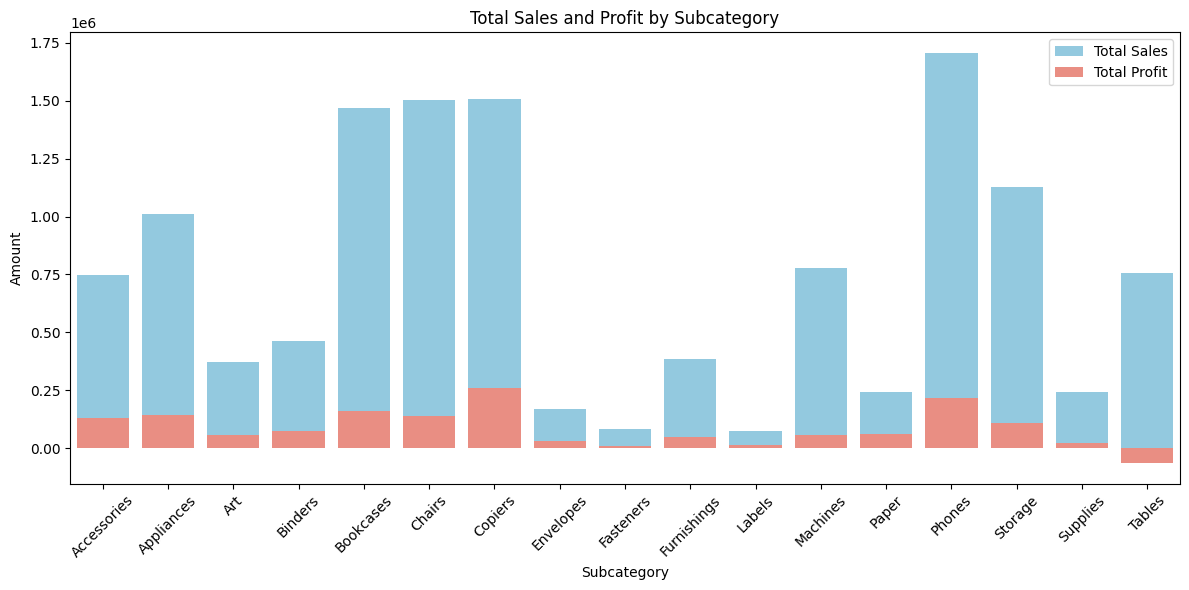

In [60]:
grouped_data = retail_df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Sub-Category', y='Sales', color='skyblue', label='Total Sales')
sns.barplot(data=grouped_data, x='Sub-Category', y='Profit', color='salmon', label='Total Profit')
plt.title('Total Sales and Profit by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### 1. Summarize your findings from the visual.

From the visual comparing the total sales and profit by subcategory, The Following were our Observations:
- Sales Distribution: Some subcategories like 'Phones', 'Chairs', and 'Copiers' show higher total sales.
- Profit Distribution: Profits vary across subcategories, with 'Phones' and 'Accessories' having high profits, while 'Tables' and 'Bookcases' show lower or negative profits.
- Relationship between Sales and Profit: Variation exists between sales and profit across subcategories, indicating potential inefficiencies.
- Identifying High-Performing Subcategories: The visualization aids in identifying well-performing subcategories and areas for improvement.

Overall, it offers insights into subcategory performance, aiding strategic decision-making and resource allocation.

#### 2. The reason for selecting the chart type you did.

The reason for selecting the grouped bar chart as the visualization type is based on the nature of the data and the goal of the analysis:
- Comparison of Multiple Variables: Allows comparison of total sales and profit across subcategories with clarity.
- Visual Clarity: Provides an intuitive way to compare values by displaying sales and profit side by side.
- Relationship Analysis: Enables exploration of the relationship between sales and profit within each subcategory.
- Aesthetic Appeal: Visually appealing and easy to interpret, suitable for presentations or reports.

Overall, the grouped bar chart effectively conveys comparative analysis of total sales and profit by subcategory, making it suitable for this data and analysis goal.

#### 3. Mention the pre-attentive attributes used. (at least 2)

Pre-attentive attributes are visual properties that can be quickly and accurately perceived without conscious effort. In the grouped bar chart visualization, several pre-attentive attributes are utilized to aid in the interpretation of the data. Here is the list of four pre-attentive attributes we used in the visualization:

- Length: Represents total sales and profit, allowing quick comparison.
- Color: Differentiates total sales and profit, aiding interpretation.
- Position: Provides spatial information along axes for comparison.
- Orientation: Vertical bars facilitate quick perception of values.

These attributes contribute to the effectiveness of the grouped bar chart, enabling viewers to grasp key insights at a glance.

#### 4. Mention the gestalt principles used. (at least 2)

In the grouped bar chart visualization, these two Gestalt principles are used:

- Proximity: Objects close to each other are perceived as related. Bars representing total sales and profit for each subcategory are placed adjacent, creating visually organized groups.
- Similarity: Objects with similar appearance are perceived as related. Bars within each group share characteristics like color, aiding comparison.

These principles contribute to the perceptual organization and interpretation of the grouped bar chart, facilitating efficient extraction of insights from the data.

### **Question 2**
<h5>Determine which State in the Central Region has the highest distribution of profits using box plot.<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h5>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    5.How many products are sold at the store,in total?

Note: Initially, we attempted to create a bar plot encompassing all states in the Central Region. However, the visualization appeared cluttered and difficult to interpret due to the abundance of states in this region. Subsequently, we endeavored to generate a box plot focusing on the top 10 states with the highest profit distribution. Despite this effort, the resulting box plot remained complex and challenging to decipher. Consequently, we opted to simplify our visualization approach by plotting a box plot solely for the state exhibiting the highest profit distribution.

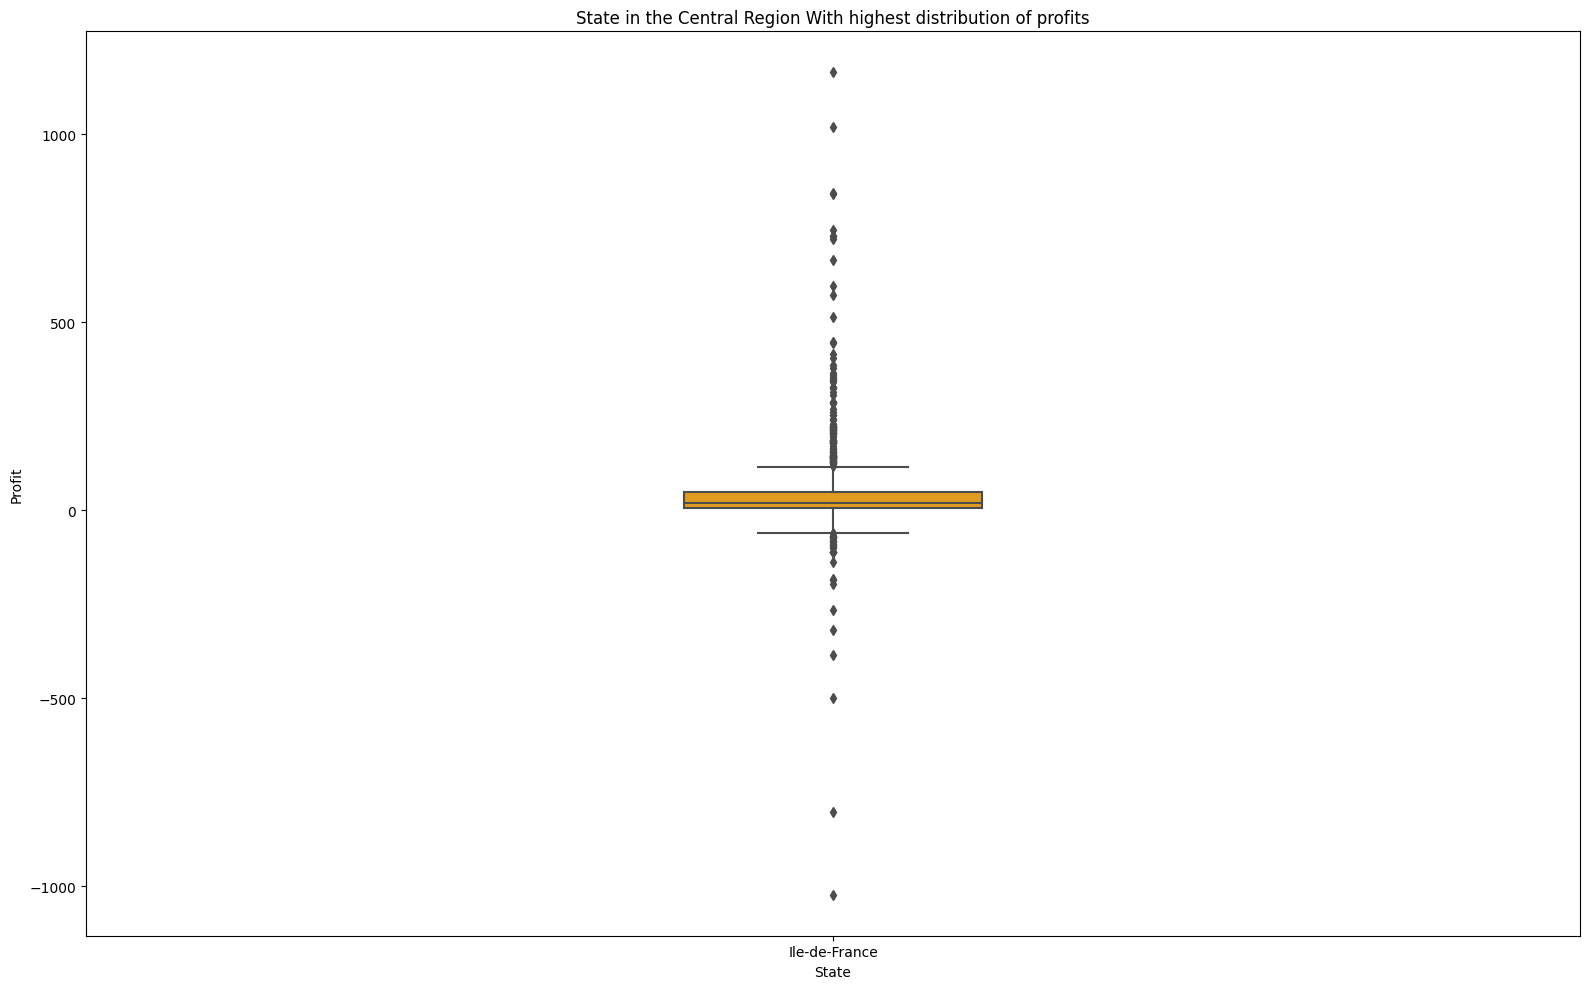

In [61]:
central_data = retail_df[retail_df['Region'] == 'Central']
state_profit = central_data.groupby('State')['Profit'].sum().reset_index()
# calculating the state in the central region with highest distribution of profit
state_profit_top1 = state_profit.nlargest(1, 'Profit')
# Filtering central_data to include only the top 1 state with highest distribution of profit
central_data_top1 = central_data[central_data['State'].isin(state_profit_top1['State'])]

plt.figure(figsize=(16, 10))
sns.boxplot(data=central_data_top1, x='State', y='Profit', width=0.2,  color='orange')
plt.title('State in the Central Region With highest distribution of profits')
plt.xlabel('State')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

#### 1. Summarise your findings from the visual.

The box plot illustrates the profit distribution for the top-performing state in the Central Region which is **Ile-de-France.** It highlights:
- Median: The box plot shows the median profit value, indicating the central tendency of the data.
- Interquartile Range (IQR): The interquartile range is represented by the box, showing the spread of profits around the median.
- Whiskers: The whiskers extend to show the profit range, indicating the minimum and maximum profit values within 1.5 times the IQR from the first and third quartiles.
- Outliers: Outliers, if present, are depicted as individual points beyond the whiskers, indicating profit values significantly higher or lower than the typical range.
  
This visualization offers insights into profit variability within the state, providing valuable information for understanding the distribution and potential anomalies in profit data.?

#### 2. The reason for selecting the chart type you did.

Box plot was chosen because it effectively summarizes the distribution of profits while highlighting key statistics such as:
- Median
- Interquartile Range (IQR)
- Outliers

It provides a concise representation of profit variability within the top-performing state in the Central Region, allowing for easy comparison and interpretation of profit distributions. Additionally, the box plot is suitable for visualizing numerical data with multiple categories, making it ideal for analyzing profit distributions across different states.


#### 3. Mention the pre-attentive attributes used. (at least 2)

The pre-attentive attributes used in the box plot visualization include:
- Length: The length of the box represents the interquartile range (IQR), providing information about the spread of profit values.
- Position: The position of the median line within the box indicates the central tendency of profit values, making it easy to identify the median profit value.


#### 4. Mention the gestalt principles used. (at least 2)

The gestalt principles used in the box plot visualization include:
- Closure: Viewers can mentally perceive the entire box as a single unit, enabling them to quickly grasp the overall spread of profit values.
- Proximity: Elements within the box plot, such as the median line and whiskers, are closely positioned to the box, aiding in their association with the central tendency and range of profit values.


#### 5.How many products are sold at the store,in total?

In [62]:
total_products_sold = df['Quantity'].sum()
print("Total number of products sold:", total_products_sold)

Total number of products sold: 178312


### Question 3
<h4>Identify which region has more number of orders and in which subcategory.<br><br>
    Write the python code in the below cell to create appropriate(single)visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>

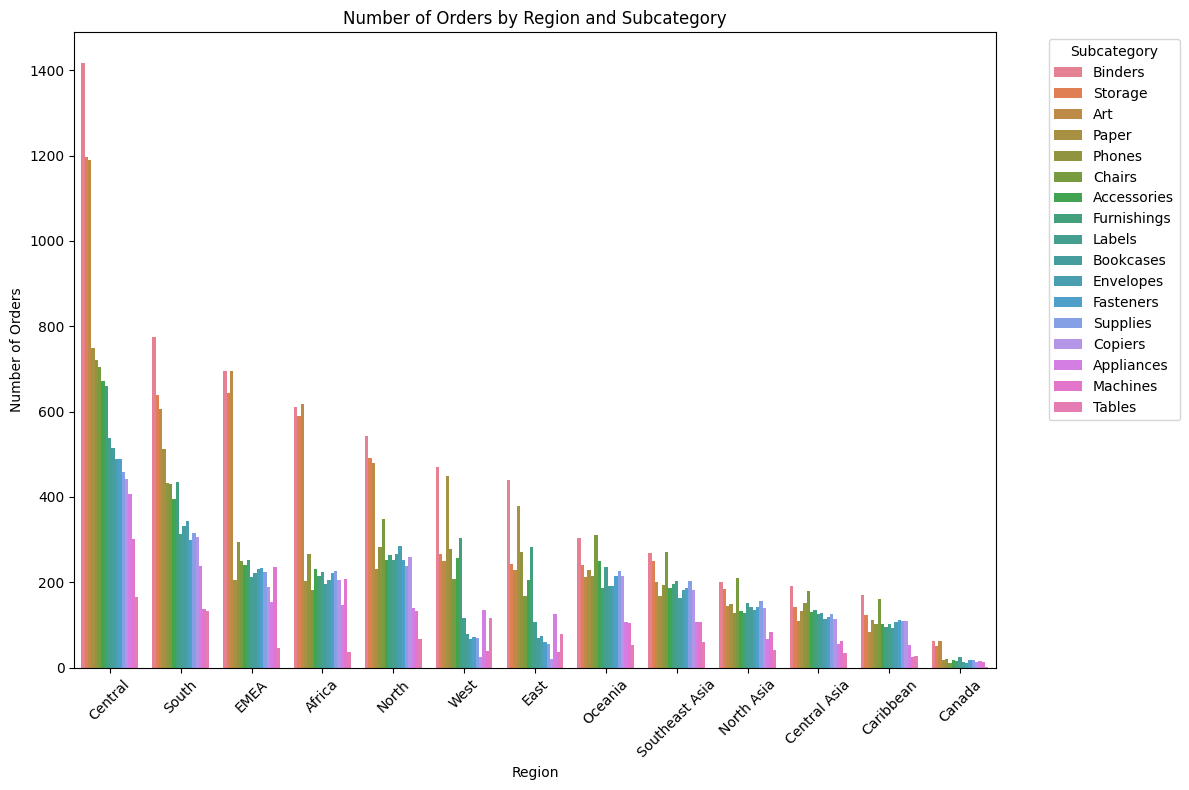

In [63]:
orders_count = retail_df.groupby(['Region', 'Sub-Category']).size().reset_index(name='Order Count')
orders_count_sorted = orders_count.sort_values(by='Order Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=orders_count_sorted, x='Region', y='Order Count', hue='Sub-Category', palette='husl')
plt.title('Number of Orders by Region and Subcategory')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 1.Summarize your findings from the visual
The visualization reveals that the Central Region leads in orders, particularly in the Binders Sub-Category. This suggests a strong demand for binders in the Central Region compared to other regions.

#### 2. The reason for selecting the chart type you did.

The selected chart type, a grouped bar plot, was chosen for the following reasons:

- Comparison: It effectively compares the number of orders across different regions and subcategories.
- Visualization: Allows for clear visualization of the distribution of orders.
- Identification: Enables easy identification of the region with the highest number of orders and the subcategory contributing the most to those orders within each region.


#### 3. Mention the pre-attentive attributes used. (at least 2)

Pre-attentive attributes used are:
- Color: Different colors represent different subcategories within each region, aiding in distinguishing between them.
- Length: The length of each bar represents the number of orders, allowing for quick comparison of order counts across regions and subcategories.


#### 4. Mention the gestalt principles used. (at least 2)

Gestalt principles used are :
- Similarity: Subcategories within each region are visually grouped together by color, facilitating the perception of related items.
- Proximity: Subcategories within each region are closely positioned on the x-axis, emphasizing their relationship and making it easier to compare order counts.


### Question 4
<h4>In which region do all Product Categories fall beneath the overall average profit?<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
        

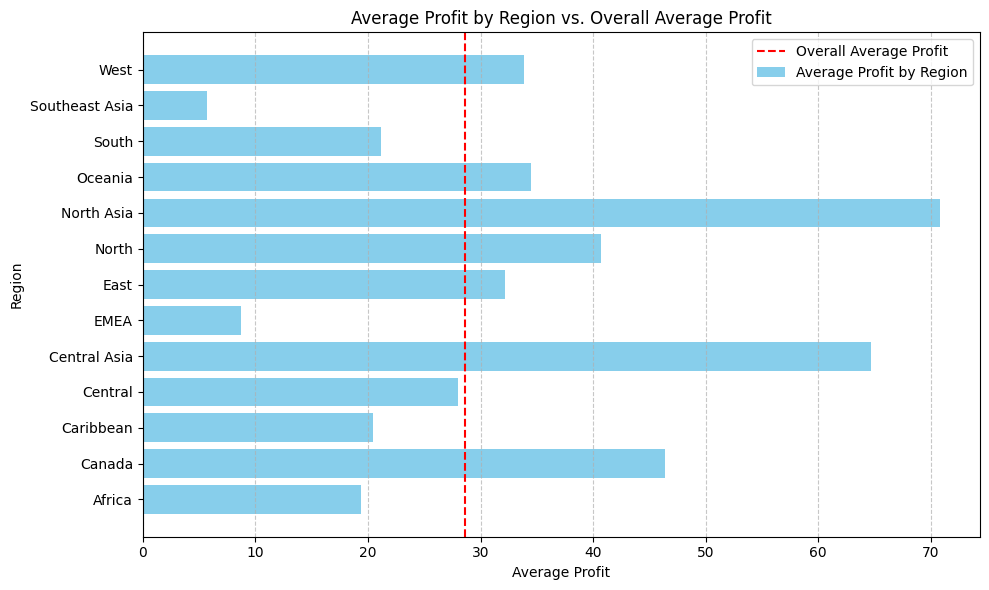

In [64]:
# Calculating overall average profit
overall_avg_profit = retail_df['Profit'].mean()

# Calculating average profit for each region
avg_profit_by_region = retail_df.groupby('Region')['Profit'].mean()

plt.figure(figsize=(10, 6))
plt.barh(avg_profit_by_region.index, avg_profit_by_region, color='skyblue', label='Average Profit by Region')
plt.axvline(x=overall_avg_profit, color='red', linestyle='--', label='Overall Average Profit')
plt.xlabel('Average Profit')
plt.ylabel('Region')
plt.title('Average Profit by Region vs. Overall Average Profit')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 1. Summarize your findings from the visual 

The visual highlights regions where all product categories fall beneath the overall average profit. Specifically, it reveals:
- South East Asia
- South
- EMEA (Europe, Middle East, and Africa)
- Central
- Caribbean
- Africa

These regions show average profits below the overall average profit. This suggests potential areas for further analysis or strategic adjustments to improve profitability.


#### 2. The reason for selecting the chart type you did.

The horizontal bar plot was chosen for the following reasons:
- Effectiveness: It effectively compares the average profit for each region with the overall average profit.
- Clear Visualization: Allows clear visualization of how each region's average profit compares to the overall average profit.
- Identification: Makes it easy to identify regions where all product categories fall beneath the overall average profit.
- Readability: Accommodates the display of region names along the y-axis, enhancing readability and interpretation of the findings.


#### 3. Mention the pre-attentive attributes used. (at least 2)

Pre-attentive attributes used are:
- Length: The length of each horizontal bar represents the average profit for each region, allowing for quick comparison.
- Color: Different colors are used to distinguish between the bars representing average profits for each region and the red dashed line indicating the overall average profit, aiding in differentiation and focus.


#### 4. Mention the gestalt principles used. (at least 2)

Gestalt principles used are:
- Closure: The overall pattern of the horizontal bars and the red dashed line helps viewers perceive the relationship between each region's average profit and the overall average profit, forming a cohesive understanding of the comparison.
- Proximity: The proximity of the bars to the red dashed line enables viewers to associate each region's average profit with the overall average profit, facilitating comparisons between them.


### Question 5

<h4>Find the customer with the lowest overall profit. What is his/her profit ratio?<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

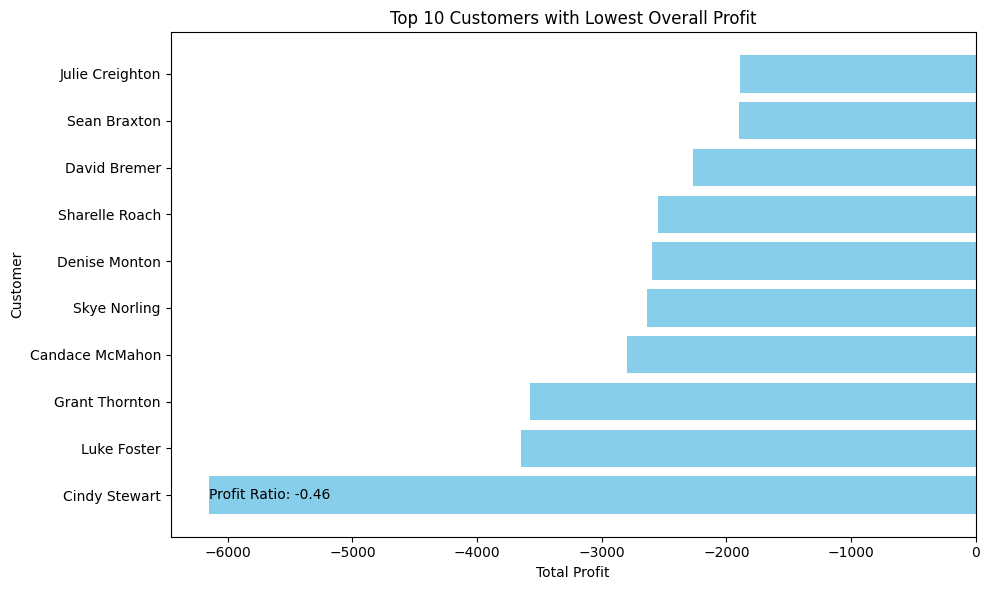

In [65]:
total_profit_by_customer = retail_df.groupby('Customer_Name')['Profit'].sum().sort_values()
top_10_lowest_profit_customers = total_profit_by_customer.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_lowest_profit_customers.index, top_10_lowest_profit_customers, color='skyblue')
plt.title('Top 10 Customers with Lowest Overall Profit')
plt.xlabel('Total Profit')
plt.ylabel('Customer')
lowest_profit_customer = top_10_lowest_profit_customers.idxmin()
lowest_profit = top_10_lowest_profit_customers.min()
total_sales_lowest_profit = retail_df[retail_df['Customer_Name'] == lowest_profit_customer]['Sales'].sum()
profit_ratio = lowest_profit / total_sales_lowest_profit
plt.text(lowest_profit, lowest_profit_customer, f'Profit Ratio: {profit_ratio:.2f}', ha='left', va='center')
plt.tight_layout()
plt.show()

#### 1. Summarize your findings from the visual

The visualization depicts the top 10 customers with the lowest overall profit. Key findings include:
- **Cindy Stewart** stands out as the customer with the lowest profit, amounting to approximately **-$6151.56**.
- The profit ratio for Cindy Stewart is approximately **-0.46**, indicating a loss for every unit of sales.

#### 2. The reason for selecting the chart type you did

Reasons for chart selection:
- Effectiveness: The horizontal bar plot effectively displays the top 10 customers with the lowest overall profit.
- Comparison: It allows for easy comparison of profit values between customers.
- Additional Information: Provides ample space to display additional information such as profit ratio as labels.
- Emphasis: Emphasizes the customer with the lowest profit, aiding in the identification of significant insights.

#### 3. Mention the pre-attentive attributes used. (at least 2)

Pre-attentive attributes used are:
- Length: The length of each horizontal bar represents the total profit for each customer, allowing for quick comparison of profit values.
- Color: Different colors could be used to differentiate the bars representing different customers, aiding in distinguishing between them. However, in this case, as we're highlighting only one customer, color is not utilized for differentiation.


#### 4. Mention the gestalt principles used. (at least 2)

Gestalt principles used are:
- Closure: The overall pattern of the horizontal bars helps viewers perceive the relationship between each customer's profit and their ranking among the top 10 lowest-profit customers.
- Proximity: The proximity of the bars allows viewers to compare the profit values of different customers easily. Additionally, the placement of the profit ratio label in close proximity to the corresponding bar reinforces the association between the profit value and the profit ratio.


 # Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question, in a coding cell, write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did. <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>  

#### What are the top-selling subcategories in each region based on the total quantity sold ?

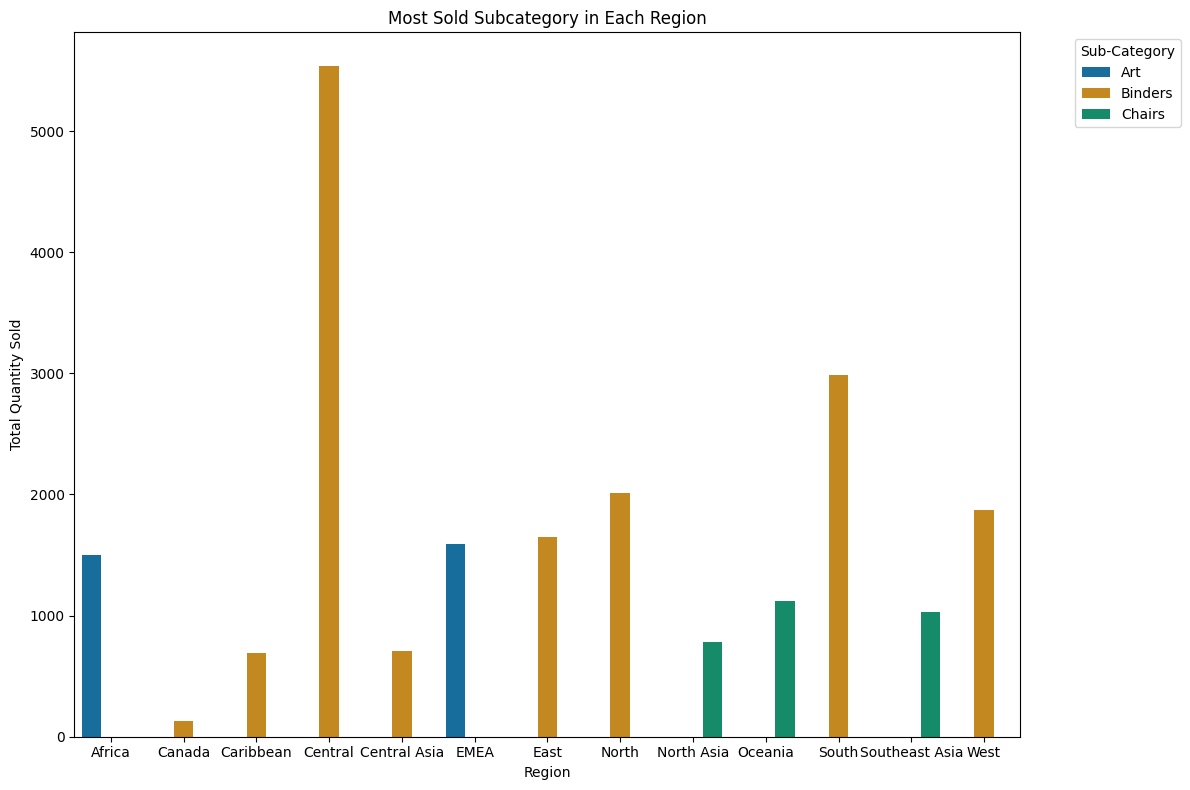

In [66]:
quantity_by_region_subcategory = retail_df.groupby(['Region', 'Sub-Category'])['Quantity'].sum().reset_index()
most_sold_subcategory_by_region = quantity_by_region_subcategory.loc[quantity_by_region_subcategory.groupby('Region')['Quantity'].idxmax()]
plt.figure(figsize=(12, 8))
sns.barplot(data=most_sold_subcategory_by_region, x='Region', y='Quantity', hue='Sub-Category', palette='colorblind')
plt.title('Most Sold Subcategory in Each Region')
plt.xlabel('Region')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 1. Summarize your findings from the visual.

The visual illustrates the top-selling subcategories in each region based on the total quantity sold. Summarized findings include:
- Africa and EMEA Regions: The most sold subcategory is Art.
- Canada, Caribbean, Central, Central Asia, East, North, South, and West Regions: Binders emerge as the top-selling subcategory.
- North Asia, Oceania, and South East Asia Regions: Chairs are the most sold subcategory.

These findings reveal regional variations in consumer preferences and provide valuable insights for businesses to tailor their marketing and inventory strategies accordingly.


#### 2. The reason for selecting the chart type you did

Reason for selecting the chart type:
- Effectiveness: The selected grouped bar plot effectively visualizes the top-selling subcategories in each region by showing the total quantity sold for each subcategory within each region.
- Comparison: This type of visualization allows for easy comparison of sales across different subcategories and regions simultaneously.
- Clarity: Using different colors for each subcategory enhances clarity and readability, making it easier to interpret the data.
- Suitability: Overall, the grouped bar plot is well-suited for presenting categorical data with multiple subcategories and regions.


#### 3. Mention the pre-attentive attributes used. (at least 2)

Pre-attentive attributes used are:
- Color: Different colors are used to represent each subcategory within the grouped bar plot, making it easy to distinguish between them at a glance.
- Length: The length of each bar within the grouped bar plot represents the total quantity sold for the corresponding subcategory in each region, allowing for quick comparison of sales between subcategories and regions.


#### 4. Mention the gestalt principles used. (at least 2)

Gestalt principles used are:
- Similarity: Subcategories within each region are visually grouped together by color, making it easy to perceive them as related entities.
- Proximity: Subcategories within the same region are positioned closely together on the x-axis, reinforcing their association and facilitating comparison between them.


<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>